## Hand_Written digit recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\thema\.conda\envs\myenvy\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thema\.conda\envs\myenvy\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\thema\.conda\envs\myenvy\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [5]:
X_train.shape




(10000, 28, 28)

In [6]:

X_test.shape

(10000, 28, 28)

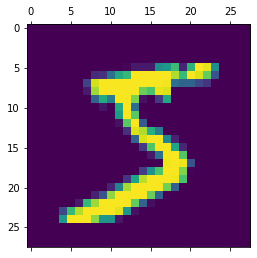

In [10]:
X_train[0].shape

plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
# sampling or quantization
X_train = X_train / 255
X_test = X_test / 255

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2704 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1237 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0849 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0637 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0419 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0273 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [15]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 871us/step - loss: 0.0863 - accuracy: 0.97580s - loss: 0.0845 - accuracy: 0.97


[0.08628742396831512, 0.9757999777793884]

In [16]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

## Peforming on CNN

In [18]:
model_2 = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               507100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
_________________________________________________________________


In [20]:

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1573 - accuracy: 0.9531
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0529 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 27s 15m

In [27]:
y_train[5]

#X_train[0].shape

plt.matshow(y_train[5])

ValueError: not enough values to unpack (expected 2, got 0)

In [22]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9758


[0.08628742396831512, 0.9757999777793884]

In [24]:
# Here we can conclude the accuracy of 97%.
# It can be achived more by tuning hyper parameters.